In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import scipy.fftpack as fftp
import os
from scipy import signal

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# fft of f(t) =0(t)*exp(-gamma*t)*sin(wt)
# random shifting of start of phase
# position frequencies
# gamma = frequency/ bandwidth
# q factor
# do it in the time domain 
# A(t)*sin(wt + psy)
# where a(t) is the magnitude of the waveform with time
# include phase slip
# make something that looks similar to the current data
# meet with Kaylie

In [3]:
figsize(15,6)
fs = 10000
secs = 100
t = np.linspace(0,secs,secs*fs)
# indexInt = random.randint(0,secs)
# ti = random.choice(arange(len(t)),indexInt)
# print(len(ti))
# plot(t[ti],t[ti],'.')

def slipper(num):
#     indexInt = random.randint(0,int(len(sz)/rate))
    ti = random.choice(arange(len(t)),num)
    return ti
ti = slipper(2)
print(len(ti))

2


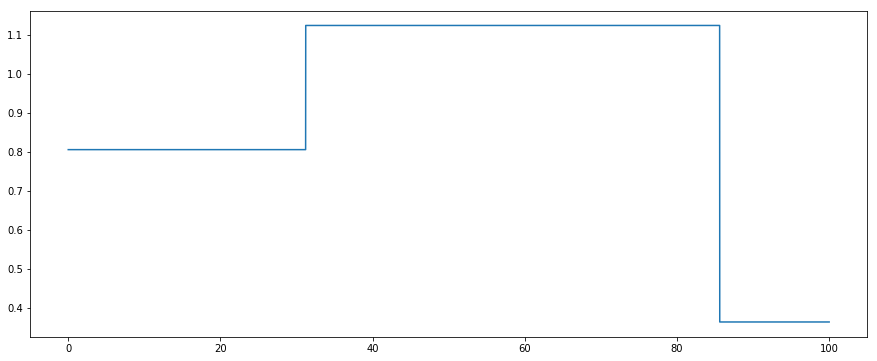

In [4]:
#create Phase Map
def phaser(sz, loc):
    slipSz = sz.shape
    loc = np.sort(loc)
    PhaseMap = np.ones(slipSz)*(2*np.pi*random.rand(1)-np.pi)
    for point in loc:
        PhaseMap[point:] = 2*np.pi*random.rand(1)-np.pi
    return PhaseMap

phase = phaser(t,ti)
plot(t,phase)

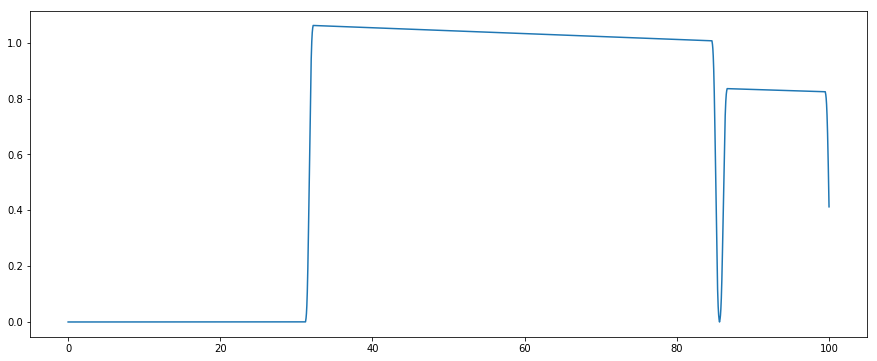

In [5]:
#create Amplitude Map
def amp_map(t_array, loc, freq, bandwidth = 0.0000001, width=1, amp_i=1, mod=0.1, mod_amp=0.05):
    #t_array: the time series values
    #          t_array[1] is used to find the sample rate that was used
    #loc: the index of random time points that a phase shift occurrs
    #
    width = int(width*(1/t_array[1]))
    dropSz = t_array.shape
    loc = np.sort(loc)
    Q = freq/bandwidth
    tempMap = np.ones(dropSz)*amp_i# + random.normal(0,0.15,1)
    AmpMap = np.copy(tempMap)*0
    AmpMap2 = np.copy(tempMap)*0
    for point in loc:
#         print(t_array[point:]-t_array[point])
        change_up = random.normal(0,0.15,1)
        AmpMap2[point:] = tempMap[point:] + change_up
        AmpMap[point:] = (tempMap[point:] + change_up)*exp(-(1/Q)*(t_array[point:]-t_array[point]))
        AmpMap[int(point-width/2):int(point+width/2)] = 0
    window = signal.hamming(int(width))
    AmpMap = signal.convolve(AmpMap,window, mode='same')/sum(window)
    AmpMap  = AmpMap #+ mod_amp*sin(2*pi*mod*t_array)
#     plot(t_array,AmpMap2)
    return AmpMap

amp = amp_map(t,ti,0.0001)

plot(t,amp)
# xlim(62.9,63.9)
#make window width dependent on frequency
#create if statement for whether the frequency is coherernt or not

Text(0.5, 1.0, 'Waveform at single frequency')

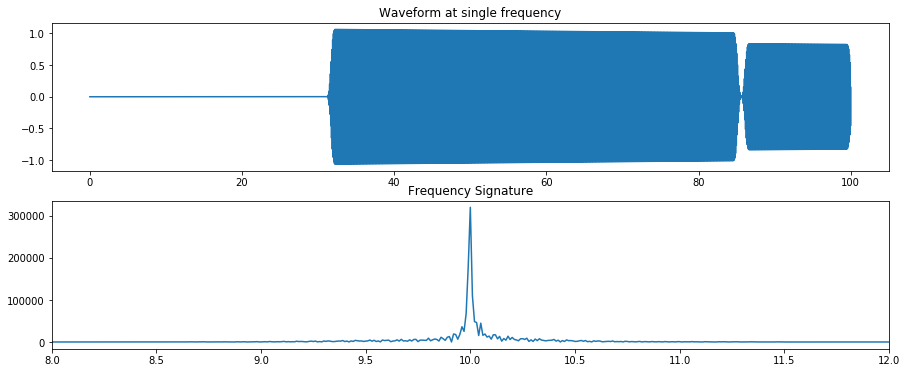

In [7]:

freq = 10*2*np.pi
wave = amp*sin(freq*t + phase)
fftData = fft.fft(wave)
freq = fft.fftfreq(len(fftData),1/fs)
fig,(ax_wave,ax_freq) = subplots(2,1)
ax_freq.plot(freq[:10000],abs(fftData[:10000]))
ax_freq.set_title('Frequency Signature')
ax_freq.set_xlim(8,12)
ax_wave.plot(t,wave)
# ax_wave.set_xlim(65,68)
ax_wave.set_title('Waveform at single frequency')


## Synthesize Vibration Data

Text(0.5, 1.0, 'Synthetic Data')

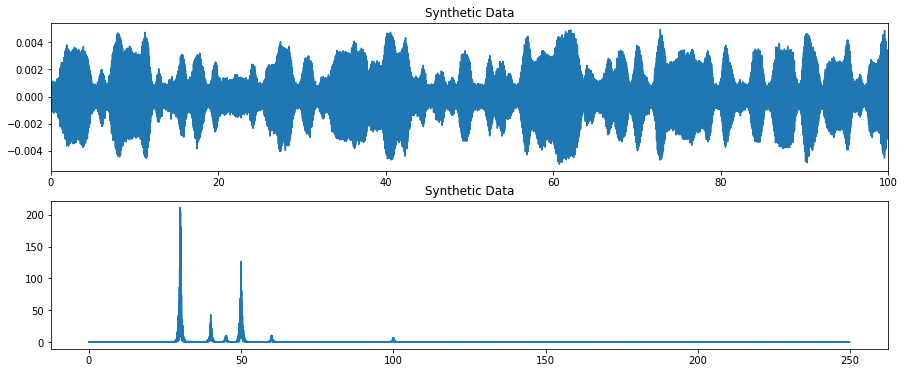

In [88]:
freqLoc = [60, 100, 30, 40,50,45]
amp = [0.6,0.4,10,2,7,0.6]
Johnson = 1*randn(len(t))
wave = np.zeros(len(t)) + Johnson
for freq,ampi in zip(freqLoc,amp):
    freq = freq*2*np.pi
    ti = slipper(100)
    phase = phaser(t,ti)
    amp = amp_map(t,ti,freq,amp_i = ampi)
    wave += amp*sin(freq*t + phase)
wave = wave/4000
fig, (ax_wave, ax_freq) = plt.subplots(2, 1)
ax_wave.plot(t,wave)
ax_wave.set_xlim([0, 100])
ax_wave.set_title('Synthetic Data')
fftData = fft.fft(wave)
freq = fft.fftfreq(len(fftData),1/fs)
ax_freq.plot(freq[:25000],abs(fftData[:25000]))
ax_freq.set_title('Synthetic Data')
#jenny's thesis geophone- voltage response curve


## Idealize Transfer Function

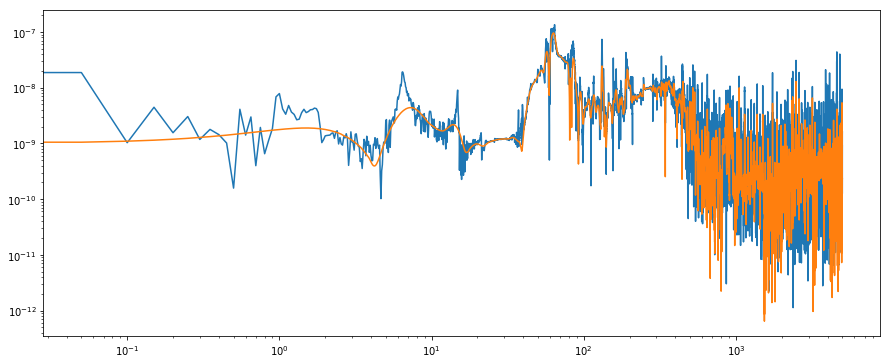

In [89]:
[transf_Alb, freqs_Alb] = joblib.load('Albert_Data/2019-02-26/trx2_v2')
loglog(freqs_Alb[:100000],absolute(transf_Alb(freqs_Alb))[:100000])
transf = transf_Alb
freqs = freqs_Alb
window = signal.hamming(100)
filtTransf = signal.convolve(transf(freqs),window, mode='same')/sum(window)
loglog(freqs[:100000],absolute(filtTransf[:100000]))
# xlim(0,300)

#linspace -> logspace 
#resample transfer function with logspace
#interpolate transfer function 
    # nearest stmpy.tools.interp1d

In [90]:
# folder_loc = 'Albert_Data/2019-02-21/'
# file_loc = 'fast-transfer-function-'

# dat_cal = np.loadtxt(folder_loc+file_loc+'001'+'.dat',skiprows=119)
# count = 1
# for j in arange(2,1000):
#     file = folder_loc+file_loc+str(j).zfill(3)+'.dat'
#     try:
#         temp_dat = np.loadtxt(file,skiprows=119)
#         dat_cal = np.concatenate((dat_cal,temp_dat))
#         print(j,end='\r')
#     except:
#         pass

In [91]:
# geo = dat_cal[:,0]
# tip = dat_cal[:,1]

# trx = cancel.Cancel(geo-mean(geo), tip-mean(tip), 1/10000,p=[200000,50000,5])
# transf = trx.transf
# freqs = trx.freqs
# loglog(freqs,absolute(transf(freqs)))

## Calculate Geophone Data

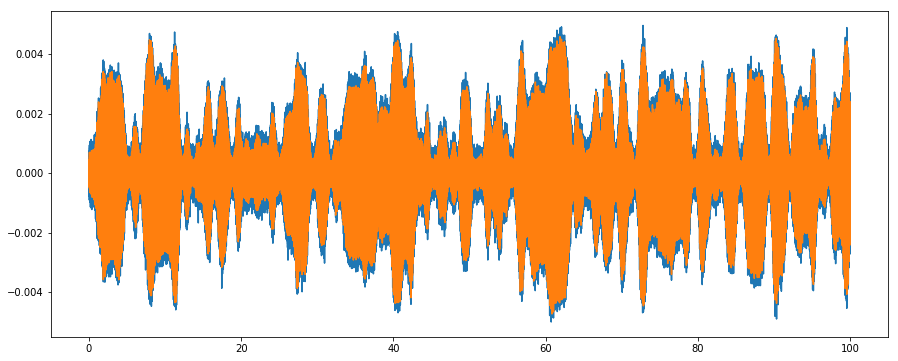

In [92]:
b, a = signal.butter(8, 0.300)
geo= signal.filtfilt(b, a, wave, padlen=150)
#bandpass with adjustable Q
# set low pass to 10000 hz
fft_geo = fftData
plot(t,wave)
plot(t,geo)

## Calculate Tip Data

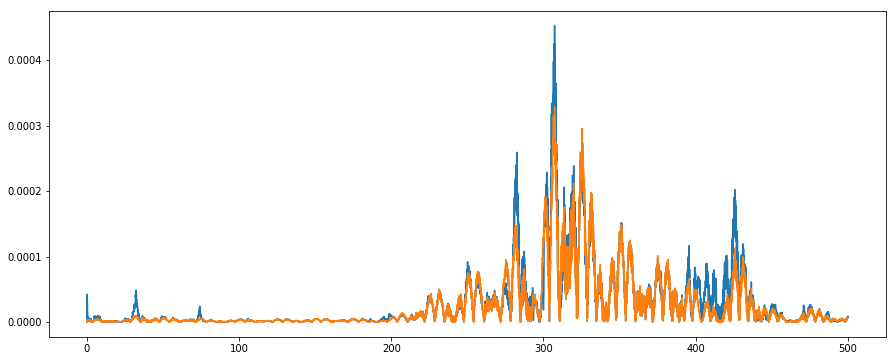

In [93]:
#I dont think create drive is the correct way to find tip data
#It is used to find the impact that vibrations detected by the geophone have on the tip
# but these are not the only sources of noise 
#Electrical noise- dont worry about it
#Feedback loop - low pass filter freq - 300 Hz
def create_drive(zdata, dt2, tf, freqs, filt =True,window = 100):
    fbottom2 = np.fft.fft(zdata)
    freq2 = np.fft.fftfreq(len(zdata),dt2)
    freq2[freq2 > freqs[np.argmax(freqs)]] = freqs[np.argmax(freqs)]
    freq2[freq2 < freqs[np.argmin(freqs)]] = freqs[np.argmin(freqs)]
    if filt:
        window = signal.hamming(window)
        filtTransf = signal.convolve(tf(freq2),window, mode='same')/sum(window)
        driver = np.fft.ifft(filtTransf*fbottom2)
        return driver
    
    driver = np.fft.ifft(tf(freq2)*fbottom2)
    return driver

tip = create_drive(fft_geo,1/10000,transf,freqs, window = 500)
z_0 = create_drive(fft_geo,1/10000,transf,freqs,filt=False)
# loglog(freq[:10000],freqData[:10000])
plot(freqs[:10000],absolute(fft.fft(z_0)[:10000]))
plot(freqs[:10000],absolute(fft.fft(tip)[:10000]))

## Noise Cancellation Test

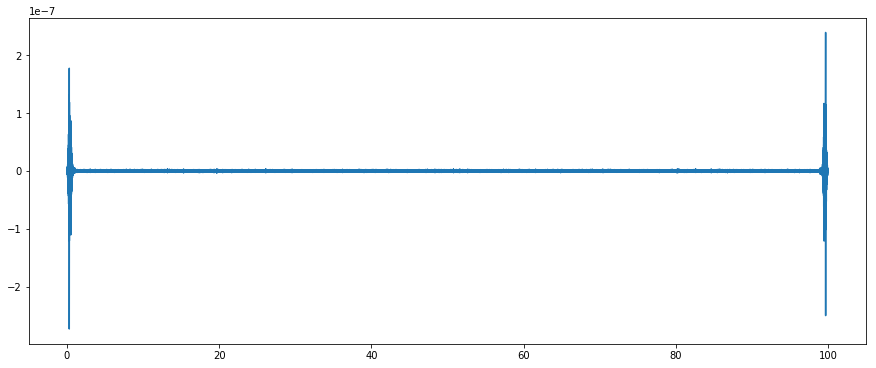

In [96]:
# make calibration data with real transfer function 
# 

fft_tip = fft.fft(tip)
z_noise = create_drive(fft_geo,1/1000,transf,freqs)
z_v = tip - z_noise
plot(t,tip)
# plot(t,z_v)
# xlim(0.25,1)

## Calculate Current Data 

-16313539785.538061 -1000


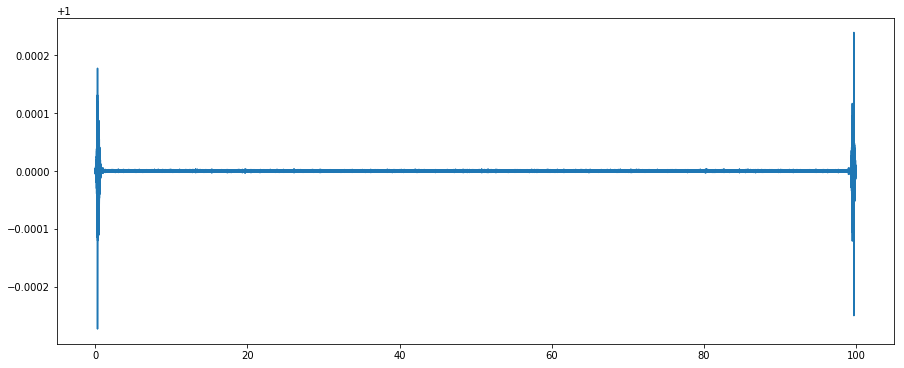

In [98]:
foldername='Albert_Data/2019-02-25/'
z_spec=loadtxt(foldername+'Z-Spectroscopy-noisy001.dat',skiprows=62)
fit = polyfit(z_spec[:,0],log(abs(z_spec[:,1])),1)
kappa = -1000#fit[0]
print(fit[0],kappa)
cur = exp(-kappa*(tip))# * I_0
plot(t,cur)

## Current with Voltage Modulation

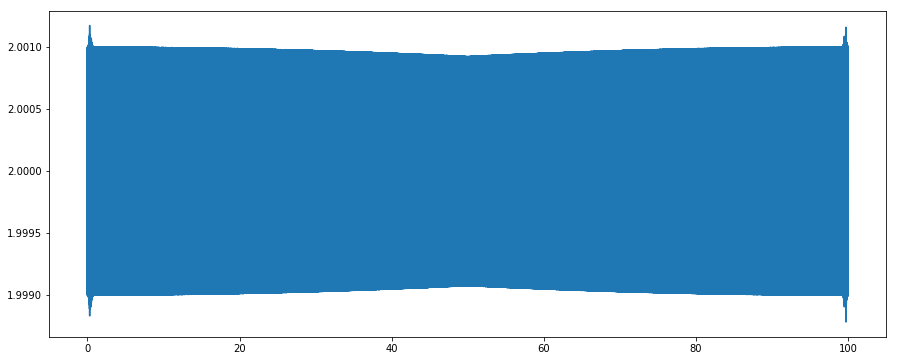

In [99]:
v_dc = np.ones(len(cur))
v_mod = 1250
mod_amp = 0.001
VMap = v_dc + mod_amp*sin(2*np.pi*v_mod*t)
cur_mod = cur+VMap
plot(t,cur_mod)
# xlim(10,10.1)

## LIX calculation 

In [ ]:
coefficient = v_mod/fs
v_ac = VMap - mean(VMap)
a = 0
print(coefficient,shape(cur_mod),shape(v_ac),shape((cur_mod*v_ac)))
lix_calc = repeat(coefficient*sum((cur_mod*v_ac).reshape(-1, 20), axis=1),20)
plot(lix_calc,'.')
print(len(lix_calc))
# xlim(0,10)

# Lock in Cancellation Methods

## Exact Propagation

In [ ]:
calibration_length = int(0.9*len(geo))

geo_cal = geo[:calibration_length]
tip_cal = tip[:calibration_length]
cur_cal = cur_mod[:calibration_length]
lix_cal = lix_calc[:calibration_length]

geo_test = geo[calibration_length:]
tip_test = tip[calibration_length:]
cur_test = cur_mod[calibration_length:]
lix_test = lix_calc[calibration_length:]

print(shape(geo_test),shape(lix_test))

In [ ]:

nc = cancel.Cancel(geo_cal,tip_cal,1/10000,p=[150000,100000,5])
transf = nc.transf
freqs = nc.freqs
z_noise = create_drive(geo_test,1/10000,transf,freqs)
cur_noise = exp(-(z_noise-mean(z_noise))*fit[0])

In [ ]:
figsize(15,6)
# t = linspace(0,len(cur_test)/10000,len(cur_test))
cur_correct = cur_test/cur_noise*1e12

plot(cur_test*1e12)
plot(cur_correct)
# xlim(0,40)

## Z-LIY

In [ ]:
# Subtract mean and divide by range.
def normalize2(array):
    return (array-mean(array))/(max(array) - min(array))

noise_calc = repeat(mean(cur_noise.reshape(-1,20),axis=1),20)
print(len(lix_test))
lix_correction = lix_test/noise_calc
plot(normalize2(lix_test))
plot(normalize2(lix_correction))

## G-LIX

In [ ]:
# A function that returns array with the n-th degree polynomial background removed. 
def fit_cancel(array, n=1):
    t=linspace(0,len(array),len(array))
    fit = polyfit(t,array,n)
    corrective = fit[n]*ones(shape(t))
    for j in arange(n):
        corrective += fit[j]*(t**(n-j))
    return array - corrective

lix_transf = cancel.Cancel(geo_cal-mean(geo_cal),fit_cancel(lix_cal-mean(lix_cal)),1/10000,p=[200000,50000,5])
lix_noise = lix_transf.create_drive(geo_test-mean(geo_test))

plot(lix_test*1e12)
plot(lix_test*1e12-lix_noise*1e12)

## G- log(LIX)

In [ ]:
log_transf = cancel.Cancel(geo_cal-mean(geo_cal),log(lix_cal),1/10000,p=[200000,50000,5])
log_noise = log_transf.create_drive(geo_test-mean(geo_test))

plot(lix_test*1e12)
# plot(t,normalize2((liy)-exp(log_noise)*1e12))
plot((exp(log(lix_test)-log_noise)*1e12))


In [ ]:
# Subtract mean and divide by range.
def normalize2(array):
    return (array-np.mean(array))/(np.max(array) - np.min(array))


plot(t[1000:2000],normalize2(geo[1000:2000]))
plot(t[1000:2000],normalize2(tip[1000:2000]))
# xlim(0,0.2)

In [ ]:
# generatial advisarial neural networks  gannns
# creates a synthetic data set that is very similar to real data
# ampltude and phase oscillations
# created a random phase map. function to creates an amplitude based on the phase
# random noise 
# wave vector fluctuations 
# G->Z->I->I+mod->LIY->T2->aliasing